In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [41]:
airport.set_index("airport").to_csv("data/airports_us.csv")

In [2]:
data_2009 = pd.read_csv("data/2009_grouped.csv")
data_2009.head()

,month,day_of_week,airline,origin,dest,num_of_flights,avg_delay
0,1,0,9E,ABE,DTW,8,3.875000
1,1,0,9E,ATL,AUS,7,-2.571429
2,1,0,9E,ATL,BHM,1,35.000000
3,1,0,9E,ATL,BNA,6,-4.833333
4,1,0,9E,ATL,BUF,4,7.750000


In [9]:
G = nx.from_pandas_edgelist(data_2009, source='origin', target='dest', edge_attr=['num_of_flights', 'avg_delay'], create_using=nx.DiGraph)

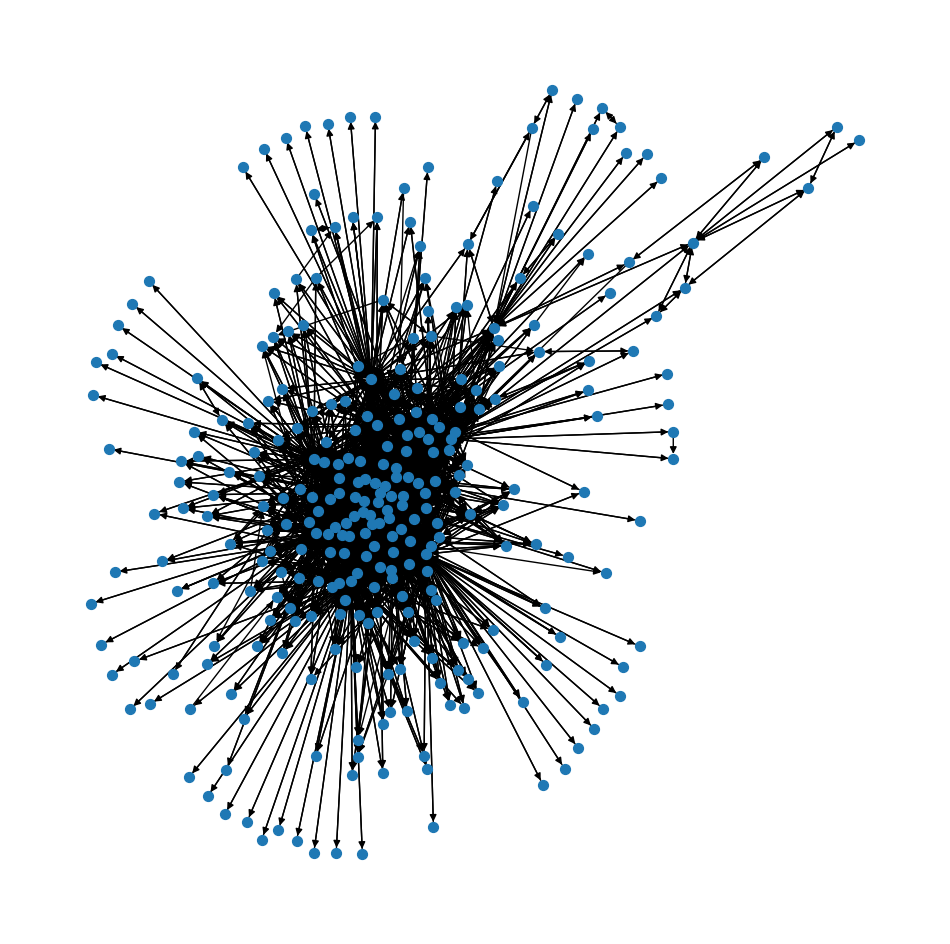

In [12]:
pos = nx.spring_layout(G) 
#Uses the Fruchterman-Reingold force-directed algorith, to position nodes and minimize overlapping
#Note: for larger graphs, these positioning algorithms can be quite slow

#We can also make the figure bigger so the graph is less squished
fig, ax = plt.subplots(figsize = (12, 12)) #Create 12 inches x 12 inches figure. We include ax = ax in nx.draw to draw on this figure
nx.draw(G, pos, node_size = 50)